In [ ]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

Text(0.5, 1.0, 'Reference')

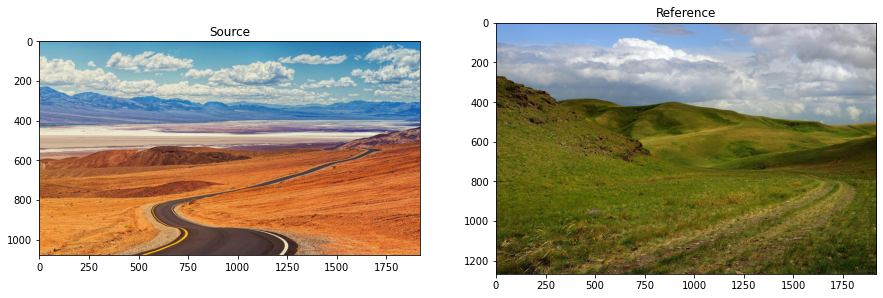

In [ ]:
#@title Showing Images
Ref = imread('Reference.jpg')
Src = imread('Source.jpg')
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1)
plt.imshow(Src)
plt.title('Source')
plt.subplot(1, 2, 2)
plt.imshow(Ref)
plt.title('Reference')

In [ ]:
#@title Functions
def cdf_cal(x):
  _, bin_idx, counts = np.unique(x, return_inverse = True, return_counts = True)
  pdf = counts/sum(counts)
  cdf = np.cumsum(pdf)
  return cdf, bin_idx

def CDF_img(img):
  m, n, k = np.shape(img)
  CDF = np.zeros([k, 256])
  BIN_idx = np.zeros([k, m*n])
  for i in range(k):
    CDF[i,:], BIN_idx[i,:] = cdf_cal(img.reshape(m*n, k)[:,i])
  return CDF, BIN_idx

def Interp_1D(cdf_src, cdf_ref, bin_idx, Shape, Type):
  pixels = np.arange(256)
  interp_values = np.interp(cdf_src, cdf_ref, pixels)
  # interp_values = interp_values.astype(Type)
  new_pixels = interp_values[bin_idx.astype(Type)].reshape(Shape)
  return new_pixels

def Matched_Hist(Src, Ref):
  m, n, k = np.shape(Src)
  Type = Src.dtype
  CDF_Src, BIN_idx = CDF_img(Src)
  CDF_Ref, _ = CDF_img(Ref)
  Matched = np.zeros([m, n, k]).astype(Type)
  for i in range(k):
    Matched[:,:,i] = Interp_1D(CDF_Src[i,:], CDF_Ref[i,:], BIN_idx[i,:], (m, n), Type)
  return Matched

Text(0.5, 1.0, 'Matched')

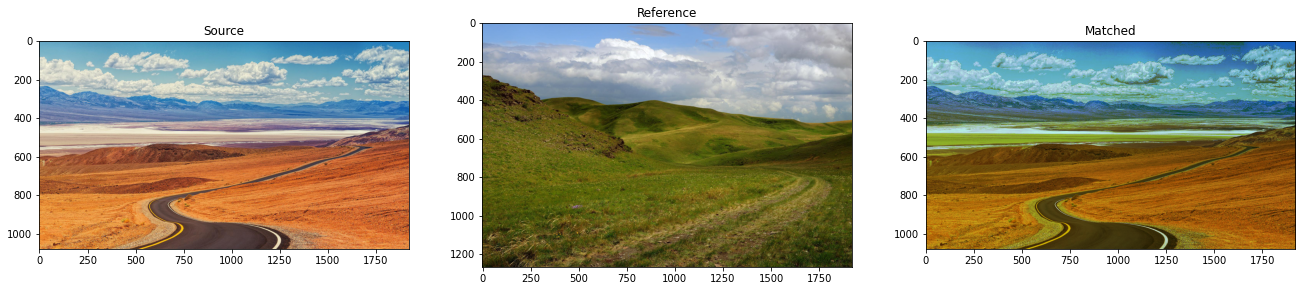

In [ ]:
#@title Showing Matched Image
Matched = Matched_Hist(Src, Ref)
plt.figure(figsize=(22.5, 5)) 
plt.subplot(1, 3, 1)
plt.imshow(Src)
plt.title('Source')
plt.subplot(1, 3, 2)
plt.imshow(Ref)
plt.title('Reference')
plt.subplot(1, 3, 3)
plt.imshow(Matched)
plt.title('Matched')